
# Project: Investigating TMDB Movie Database.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



The data that I will be analysing are information on 10000 movies from The Movie Database (TMDb). 

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('tmdb-movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning 
> There are several columns such as "homepage" and "tagline" that have too many missing values. I will drop these columns first and then clean the rest of the dataframe by dropping rows with missing values

> There is only 1 duplicated row, and I will drop that too

In [4]:
# check for duplication
sum(df.duplicated())



1

In [5]:
#drop duplication
df.drop_duplicates(inplace=True)

In [6]:
#check.
sum(df.duplicated())

0

In [7]:
#info of df now
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

In [8]:
#drop columns with missing data
df.drop(['homepage','tagline','keywords','production_companies'],1, inplace=True)



In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 17 columns):
id                10865 non-null int64
imdb_id           10855 non-null object
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
cast              10789 non-null object
director          10821 non-null object
overview          10861 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(4), int64(6), object(7)
memory usage: 1.5+ MB


In [10]:
#after dropping columns that have too many missing values, I will remove rows that have missing values.
df.dropna(0, inplace=True)

In [11]:
#check info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10724 entries, 0 to 10865
Data columns (total 17 columns):
id                10724 non-null int64
imdb_id           10724 non-null object
popularity        10724 non-null float64
budget            10724 non-null int64
revenue           10724 non-null int64
original_title    10724 non-null object
cast              10724 non-null object
director          10724 non-null object
overview          10724 non-null object
runtime           10724 non-null int64
genres            10724 non-null object
release_date      10724 non-null object
vote_count        10724 non-null int64
vote_average      10724 non-null float64
release_year      10724 non-null int64
budget_adj        10724 non-null float64
revenue_adj       10724 non-null float64
dtypes: float64(4), int64(6), object(7)
memory usage: 1.5+ MB


<a id='eda'></a>
## Exploratory Data Analysis



### Question 1: Genre.
Which genre of movies are made most over time? <br>
Which genre of movies gives the best profit on average?<br>
Which genre of movies receives the best ratings?

To analyse the distribution genre, I will first create a set that contains all the unique genre names.

In [12]:
##create a set of genre
genre_list=set()
for i in df['genres'].str.split("|"):
    genre_list=genre_list.union(i)

In [13]:
genre_list

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

#### First, I will examine whicn genre of movies is made most over time?

In [14]:
#generate an empty dictionary
genre_dict={}

#assign 0 to dictionary items first
for i in genre_list:
    genre_dict[i]=0
    
#replace 0 with count data
for i in genre_list:
    for a in df['genres'].str.split("|"):
        genre_dict[i]+=a.count(i)

In [15]:
list(genre_dict.items())

[('Music', 398),
 ('Horror', 1636),
 ('Comedy', 3774),
 ('Romance', 1707),
 ('Fantasy', 905),
 ('Drama', 4744),
 ('TV Movie', 162),
 ('Adventure', 1463),
 ('Family', 1213),
 ('Mystery', 808),
 ('Western', 164),
 ('Crime', 1353),
 ('Animation', 662),
 ('War', 268),
 ('Science Fiction', 1217),
 ('Foreign', 184),
 ('Documentary', 470),
 ('Thriller', 2902),
 ('History', 330),
 ('Action', 2371)]

In [16]:
# convert the dictionary to a list
genre_count=[]
for k,v in genre_dict.items():
    genre_count.append([k,v])

In [17]:
#sort the list
genre_count.sort(key=lambda x:x[1],reverse=True)

Create a graph showing the number of movies by genres

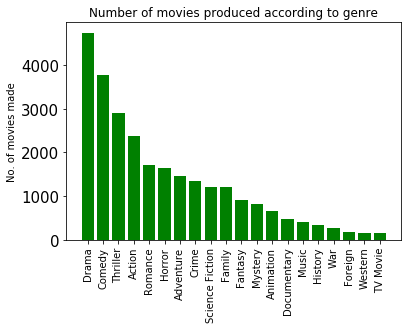

In [21]:
x_label=[i[0] for i in genre_count]
y_axis=[i[1] for i in genre_count]
x_axis=range(len(genre_count))
plt.bar(x_axis, y_axis, color='g')
plt.xticks(x_axis, x_label)
plt.xticks(rotation=90, fontsize = 10)
plt.yticks(fontsize = 15)
plt.title("Number of movies produced according to genre")
plt.ylabel("No. of movies made", fontsize = 10);


Drama is the most made genre, followed by Comedy and Thriller. The least made genre is TV movies. 
#### Next, I will investigate which genre generates the most profits.
   
    

I will create a list with average profit for each genre

In [19]:
#reset index because I deleted many rows
df.reset_index(drop=True,inplace=True)
#Create an empty list to hold the information
profit_list=[]
#iterate through the list and get average profit information
for i in genre_list:
    profit=0
    for a in range(len(df)):
        if i in df['genres'][a].split("|"):
            profit+=df['revenue_adj'][a]-df['budget_adj'][a]
    profit_list.append([i,profit/genre_dict[i]])
#check the list
profit_list

[['Music', 34537161.679360777],
 ['Horror', 16327843.797801172],
 ['Comedy', 32137122.712431218],
 ['Romance', 32632267.381068051],
 ['Fantasy', 74707082.950170964],
 ['Drama', 25650568.14121972],
 ['TV Movie', 55268.575865241437],
 ['Adventure', 98272344.63461633],
 ['Family', 61723869.256193019],
 ['Mystery', 31484729.211066179],
 ['Western', 21735555.560718738],
 ['Crime', 35128841.755657531],
 ['Animation', 63316048.837750793],
 ['War', 41362434.140926749],
 ['Science Fiction', 58020645.965436652],
 ['Foreign', -627383.31825061422],
 ['Documentary', 1789833.0435530567],
 ['Thriller', 34664003.257203512],
 ['History', 21672146.514814664],
 ['Action', 59120548.157277226]]

I will then create a bar graph from this list

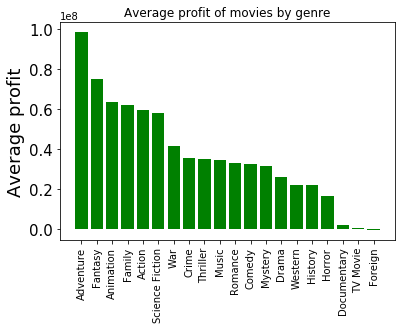

In [24]:
#sort the list
profit_list.sort(key = lambda x:x[1], reverse = True)

#Graph
y_axis = [i[1] for i in profit_list]
x_axis = range(len(profit_list))
x_label = [i[0] for i in profit_list]

plt.bar(x_axis, y_axis, align='center', color='g')
plt.xticks(x_axis, x_label)
plt.xticks(rotation=90, fontsize = 10)
plt.yticks(fontsize = 15)
plt.title("Average profit of movies by genre")
plt.ylabel("Average profit", fontsize = 18);

Adventure genre, on average, makes the most profit, followed by Fantasy and Animation.
Documentary, TV Movies and Foreign movies do not perform very well.
Drame, the movie genre with most movies made, is also in the low profit range.

#### Finally, I will examine the relationship between genre and ratings.

In [25]:
#create an empty list to hold the values
rating_list=[]
#iterate
for i in genre_list:
    rating=0
    for a in range(len(df)):
        if i in df['genres'][a].split("|"):
            rating+=df['vote_average'][a]
    rating_list.append([i,rating/genre_dict[i]])

rating_list

[['Music', 6.4688442211055204],
 ['Horror', 5.3377139364303146],
 ['Comedy', 5.901245363010065],
 ['Romance', 6.0427065026362037],
 ['Fantasy', 5.8525966850828777],
 ['Drama', 6.1631956155143408],
 ['TV Movie', 5.7419753086419787],
 ['Adventure', 5.9337662337662431],
 ['Family', 5.9858202802967959],
 ['Mystery', 5.946534653465342],
 ['Western', 6.0835365853658541],
 ['Crime', 6.1249815225425088],
 ['Animation', 6.3839879154078627],
 ['War', 6.2966417910447747],
 ['Science Fiction', 5.6533278553820905],
 ['Foreign', 5.9788043478260864],
 ['Documentary', 6.8985106382978767],
 ['Thriller', 5.7503101309441806],
 ['History', 6.4118181818181803],
 ['Action', 5.7822859552931316]]

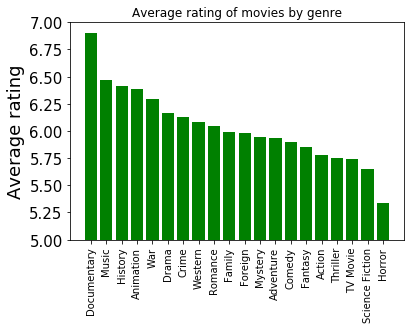

In [26]:
#sorting
rating_list.sort(key = lambda x:x[1], reverse = True)
#Graph
y_axis = [i[1] for i in rating_list]
x_axis = range(len(rating_list))
x_label = [i[0] for i in rating_list]

plt.bar(x_axis, y_axis, align='center', color='g')
plt.xticks(x_axis, x_label)
plt.xticks(rotation=90, fontsize = 10)
plt.yticks(fontsize = 15)
plt.ylim(5,7)
plt.title("Average rating of movies by genre")
plt.ylabel("Average rating", fontsize = 18);

Horror movie receives the lowest average rating. Documentary receives the highest. Adventure, which is the most profitable genre, does not necessarily receive high rating.

### Question2: Runtime
How has runtime of a movie changes over time? <br>
How does the runtime of a movie correlate with its ratings, profit?

#### First, I will examine how runtimes of movies changed over time.

Text(0.5,1,'Average movie run time by release year')

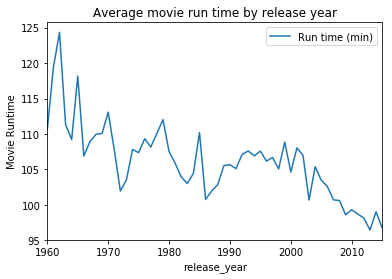

In [131]:
#groupby runtime and plot
runtime_by_year=df.groupby(by='release_year').mean()['runtime']

runtime_by_year.plot(label='Run time (min)')
plt.legend()
plt.ylabel('Movie Runtime')
plt.title('Average movie run time by release year')

Movie runtime actually decreased through time.

#### Next, I will examine the relationship between rumtime and ratings.

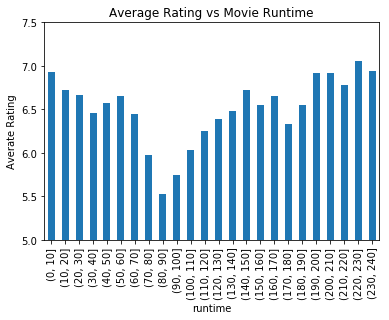

In [129]:
# I will group runtime by 5 minute intervals till 250 minutes. Movies longer than 250 minutes are too few.

vote_by_runtime=df.groupby(pd.cut(df['runtime'],np.arange(min(df['runtime']),250,10))).mean()['vote_average']
plt.ylim(5,7.5)
plt.ylabel('Averate Rating')
plt.title('Average Rating vs Movie Runtime')
vote_by_runtime.plot(label='Run time (min)',kind="bar")

Movies that are less than 70 minutes long have high ratings. 
Movies that are more than 70 minutes long tend to have higher ratings when the movies are longer.

#### Lastly, I will examine the relationship between runtime and profit of a movie.

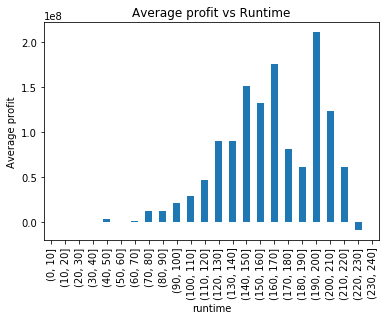

In [125]:
group_by_runtime=df.groupby(pd.cut(df['runtime'],np.arange(min(df['runtime']),250,10))).mean()
group_by_runtime['profit']=group_by_runtime['revenue_adj']-group_by_runtime['budget_adj']
profit_by_runtime=group_by_runtime['profit']

profit_by_runtime.plot(kind="bar")
plt.ylabel('Average profit')
plt.title('Average profit vs Runtime');

Movies that are less than 100 minutes have low average profit. Movies profit increases as the runtime increases from 100 to 170min and then profit decreases if runtime is longer. However, there is a spike in profit at movies of 190-200 minutes long and then decrease as runtime further increases.

<a id='conclusions'></a>
## Conclusions


### To summarize the important findings:
#### Question 1: Genre vs Count/Profit/Ratings:
Drama is the most produced genre in this dataset.<br>
Adventure genre, on average, correlates with the largest profit, although its rating is in the low range <br>
Documentary movies, on average, receive the highest ratings. Drama, the most produced genre, has relatively high ratings as well. <br>

#### Question 2: Runtime vs Year/Profit/Ratings
Interestingly, runtime of movies has been decreasing since 1960, from close to 2 hours to a little over 1.5 hours. <br>
Movies that are more than 70 minutes long tend to have higher ratings when the movies are longer. <br>
Movies that are less than 100 minutes have low average profit. Movies profit increases as the runtime increases from 100 to 170min and then profit decreases if runtime is longer. However, there is a spike in profit at movies of 190-200 minutes long and then decrease as runtime further increases.

#### Limitations
There are missing values in the dataset, and about 100 entries of data had to be deleted because of missing values.
For several categories, such as "tagline", "keywords" and "production companies", there are too much missing values to be analyzed.

#### Future Questions to Investigate
From the results of question 2, the runtime and ratings has an interesting treand that is worth exploring further. The shorter moveis received high ratings, but as soon as the runtime goes beyond 70 minutes, the ratings drop sharply. My hypothesis is that the shorter movies are of a specific set of genres and the genres of these movies determined their high ratings. To analyse this, I will add "genre" as an additional variable to the existing runtime/rating analysis.

Other interesting questions that can be answered by this dataset includes:<br>
1. Does certain actor/director correlate with high rating/profit?
2. Have the proportions of movies made of different genres changed over time?
3. Which genre receives the most votes on average?


In [132]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0